In [1]:
"""

              Implementation of the cross validation
          and comparison with GridSearchCV of Scikit-learn.
                        
    
 * The topic is the prediction of wine quality.
 * The problem is transformed in a classification problem: quality 0 or 1.            
                        
 * Baseline: GridSearchCV with Scikit-learn.                       
 * Implementation of my cross validation.
 * Comparison of my cross validation and GridSearchCV.
 * Comparison of Python methods cross_validate and cross_val_score.

"""
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neighbors, metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

Variables names: 
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'] 



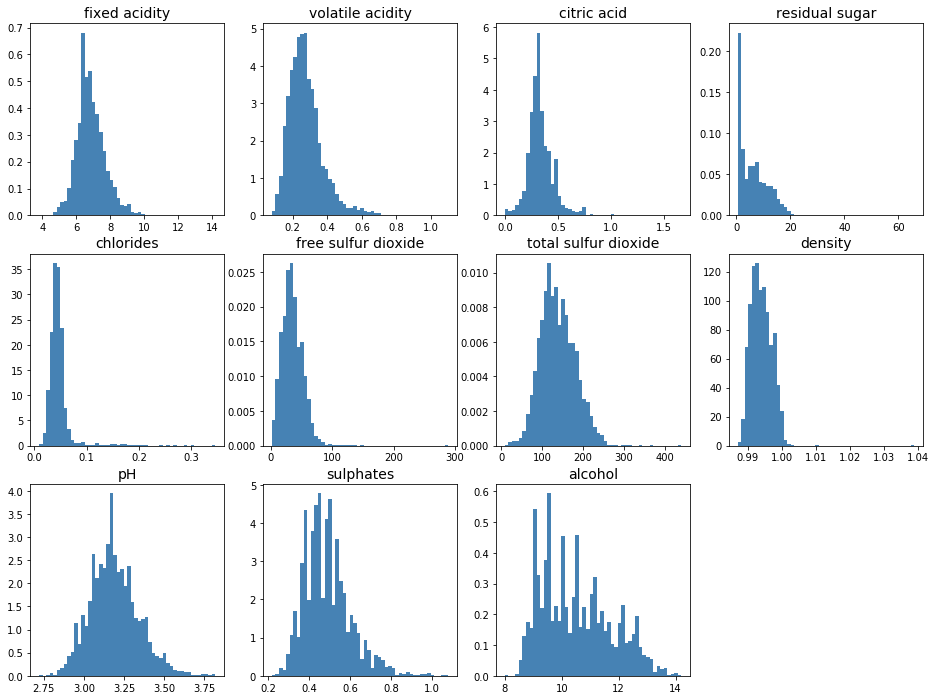

In [2]:
data = pd.read_csv('winequality-white.csv', sep=";")
print("Variables names: \n", list(data), "\n")
X=data.iloc[:,0:-1]
y=data.iloc[:,-1]

fig=plt.figure(figsize=(16,12))
for ind in  range(X.shape[1]):
    ax=fig.add_subplot(3,4,ind+1)
    ax.hist(X[X.columns[ind]],density=True,bins=50,color='steelblue',edgecolor='none')
    plt.title(X.columns[ind],fontsize=14)

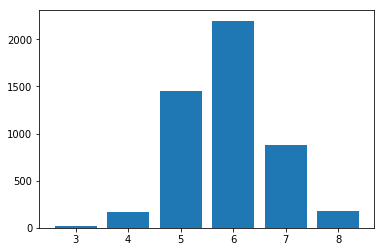

In [3]:
# visualize the distribution of the labels
absc = range(np.min(y),np.max(y))
plt.bar(absc,[(y==a).sum() for a in absc])
"""
   Transformation into a classification problem:
       * quality < 6: 0
       * quality >= 6 : 1
"""
# Variable de classification
y_class = np.where(y<6, 0, 1)

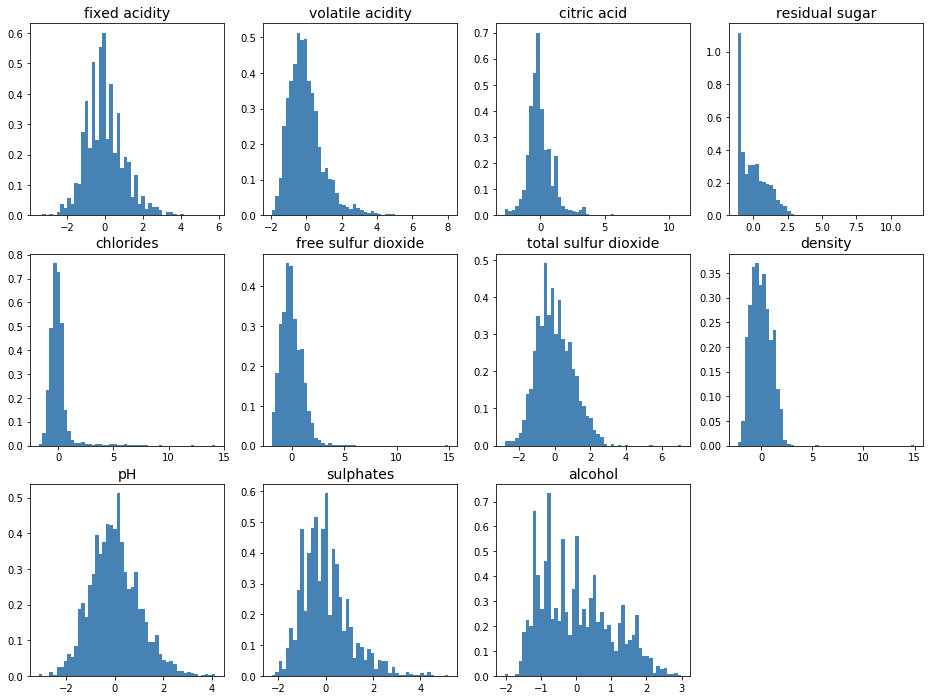

In [4]:
"""
     Splitting and standardization of data
"""    
# Splitting data
# 30% of data on the test set
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y_class,test_size=0.3)
# Standardization of data
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

# Visualization features after scaling data
fig=plt.figure(figsize=(16,12))
for ind in range(X_train_std.shape[1]):
    ax=fig.add_subplot(3,4,ind+1)
    w=X_train_std[:,ind]
    ax.hist(w,density=True,bins=50,color='steelblue',edgecolor='none')
    plt.title(X.columns[ind],fontsize=14)

# Python cross validation

In [5]:
"""

        Baseline results with GridSearchCV of Scikit-learn

        GridSearchCV performs a cross validation of the k parameter
        of the kNN algorithm - the number of neighbors.

"""

# line search on the number of neighbor of kNN
list_neigh = [3, 5, 7, 9, 11, 13, 15]
param_grid = {'n_neighbors':list_neigh}
# number of folds
nbfolds = 5
# BASELINE: GridSearchCV of scikit-learn
clf = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), 
                                   param_grid,
                                   cv=nbfolds, 
                                   scoring = 'accuracy', # metrics
                                   return_train_score=True)

clf.fit(X_train_std, y_train)

print("Best hyperparameter on the training set:",clf.best_params_)
print("Cross validation results :")
for mean, mean_train, std, params in zip(clf.cv_results_['mean_test_score'], 
                             clf.cv_results_['mean_train_score'],
                             clf.cv_results_['std_test_score'], 
                             clf.cv_results_['params'] 
                             ):
    print("\t%s = %0.8f (+/-%0.03f) for %r" % ('accuracy',mean,std*2,params)) 
    
y_pred = clf.predict(X_test_std)
print("On the test set : %0.8f" % metrics.accuracy_score(y_test, y_pred))

Best hyperparameter on the training set: {'n_neighbors': 9}
Cross validation results :
	accuracy = 0.76196033 (+/-0.014) for {'n_neighbors': 3}
	accuracy = 0.75758460 (+/-0.015) for {'n_neighbors': 5}
	accuracy = 0.75845974 (+/-0.011) for {'n_neighbors': 7}
	accuracy = 0.76254376 (+/-0.018) for {'n_neighbors': 9}
	accuracy = 0.76137690 (+/-0.020) for {'n_neighbors': 11}
	accuracy = 0.76225204 (+/-0.014) for {'n_neighbors': 13}
	accuracy = 0.76079347 (+/-0.016) for {'n_neighbors': 15}
On the test set : 0.73877551


# My cross validation

In [6]:
import my_cross_validation

print("My cross validation results:")
my_cross_validation.my_cross_val(list_neigh, nbfolds, 
                              X_train_std, y_train, X_test_std, y_test)

My cross validation results:
accuracy = 0.76195550 for n_neighbors: 3
accuracy = 0.75757679 for n_neighbors: 5
accuracy = 0.75845993 for n_neighbors: 7
accuracy = 0.76253477 for n_neighbors: 9
accuracy = 0.76136816 for n_neighbors: 11
accuracy = 0.76224789 for n_neighbors: 13
accuracy = 0.76079356 for n_neighbors: 15

Best hyperparameter on the training set : n_neighbors = 9
On the test set : 0.73877551


In [7]:
"""
                 RESULTS COMPARISON  
          (cross_validate VS cross_val_score)

"""
for i in list_neigh:
    clf_test = neighbors.KNeighborsClassifier(n_neighbors=i)
    cv_results_bis = cross_validate(clf_test.fit(X_train_std,y_train),
                            X_train_std,y_train,scoring='accuracy',
                            cv=nbfolds,return_train_score=True)
    scores = cross_val_score(clf_test,X_train_std,y_train, scoring='accuracy', cv=nbfolds)
    print("accuracy = %0.8f (+/- %0.3f) for n_neighbors: %d" % (scores.mean(), scores.std() * 2, i))

accuracy = 0.76195550 (+/- 0.014) for n_neighbors: 3
accuracy = 0.75757679 (+/- 0.015) for n_neighbors: 5
accuracy = 0.75845993 (+/- 0.011) for n_neighbors: 7
accuracy = 0.76253477 (+/- 0.018) for n_neighbors: 9
accuracy = 0.76136816 (+/- 0.020) for n_neighbors: 11
accuracy = 0.76224789 (+/- 0.014) for n_neighbors: 13
accuracy = 0.76079356 (+/- 0.016) for n_neighbors: 15
